Praktikum 6 datamining

K means clustering

NAMA    : FRANS VITO JONATHAN SIMAMORA

NIM     : 202410101147

KELAS DATA MINING A

    Tugas
Lakukan dan jelaskan clustering pada dataset mall_customer.csv dengan ketentuan dan
langkah-langkah sebagai berikut.

Data preprocessing
1. Load dataset dan buang feature yang tidak dibutuhkan serta rapikan dataset
2. Cek tipe data pada masing-masing feature dan encoding bila diperlukan
3. Cek data null dan data duplicated
4. Handling miss value dan handling duplicated data jika diperlukan
5. Cek data outlier dengan visualisasikan dalam boxplot pada masing-masing feature
6. Handling outlier jika diperlukan
7. Visualisasikan korelasi antar-feature dengan visualisasi heatmap
8. Normalisasikan data menggunakan normalisasi tertentu (bebas bisa standart atau minmax)
9. Tampilkan scatter plot sebelum clustering dengan kombinasi 4 atribut

Modelling

10. Clusterlah dataset dengan nilai K 3, 4, 5 dengan atribut 'Annual Income (k$)' dan 'Spending
Score (1-100)'
11. Tampilkan scatter plot setelah clustering dengan centroid masing-masing cluster
12. Tentukan manakah k terbaik jika dilakukan analisis secara visual

Optional nilai tambah (tidak wajib dikerjakan)

13. Lakukan implementasi elbow method untuk mendeteksi K terbaik
14. Lakukan PCA untuk feature reduction dari seluruh feature menjadi 2 feature
15. Lakukan visualisasi 3D scatterplot setelah clustering

In [50]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
%matplotlib inline

DATA PREPROCESSING

In [84]:
#memanggil csv
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [85]:
#buang feature yang tidak dibutuhkan serta rapikan dataset
#akan membuang feature CustomerID, karena hanya digunakan sebagai unique id pada database

data.drop('CustomerID', axis=1, inplace=True)
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [86]:
#Cek tipe data pada masing-masing feature dan encoding bila diperlukan
data.info() #mengecek tipe data
print("-"*70)
data['Genre'] = LabelEncoder().fit_transform(data['Genre']) #Encode feature genre 
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
----------------------------------------------------------------------


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [25]:
# Cek data null dan data duplicated
print(data.isna().sum()) #mencari berapa data yang null
print("\nduplikat = ", data.duplicated().sum()) #mencari berapa data yang null

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

duplikat =  0


<AxesSubplot:>

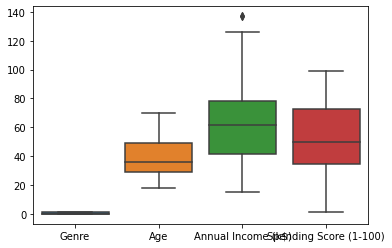

In [28]:
#Cek data outlier dengan visualisasikan dalam boxplot pada masing-masing feature
sns.boxplot(data=data)

<AxesSubplot:>

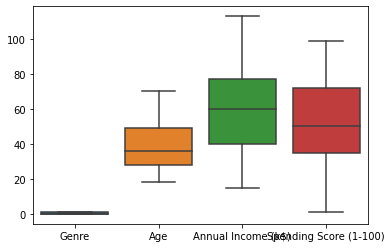

In [32]:
#Handling outlier jika diperlukan
pemasukan = data['Annual Income (k$)']
Q1 = pemasukan.quantile(0.25)
Q3 = pemasukan.quantile(0.75)
hasil = Q3-Q1

data = data[(pemasukan>Q1 - hasil)&(pemasukan<Q3 + hasil)] #mengubah data outlier
sns.boxplot(data=data) 

<AxesSubplot:>

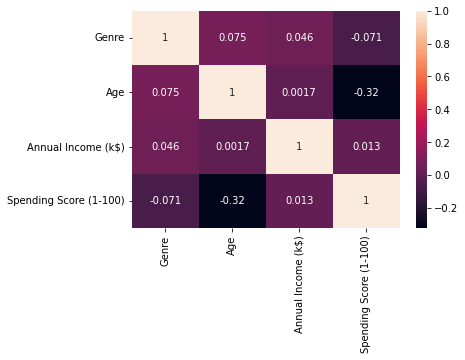

In [33]:
#Visualisasikan korelasi antar-feature dengan visualisasi heatmap
sns.heatmap(data.corr(), annot=True)

In [35]:
#Normalisasikan data menggunakan normalisasi tertentu (bebas bisa standart atau minmax)
cs = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
data[cs] = MinMaxScaler().fit_transform(data[cs])
data

C:\Users\Frans Vito\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0.019231,0.000000,0.387755
1,1,0.057692,0.000000,0.816327
2,0,0.038462,0.010204,0.051020
3,0,0.096154,0.010204,0.775510
4,0,0.250000,0.020408,0.397959
...,...,...,...,...
189,0,0.346154,0.897959,0.857143
190,0,0.307692,0.897959,0.224490
191,0,0.269231,0.897959,0.693878
192,1,0.288462,1.000000,0.071429


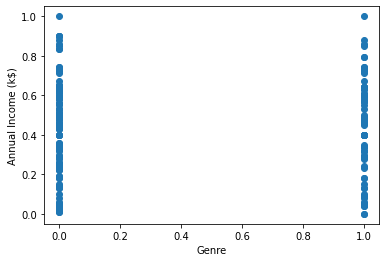

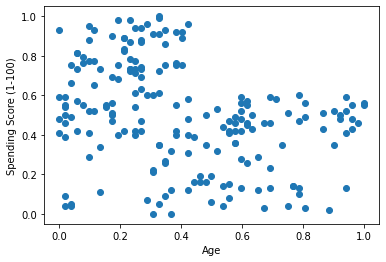

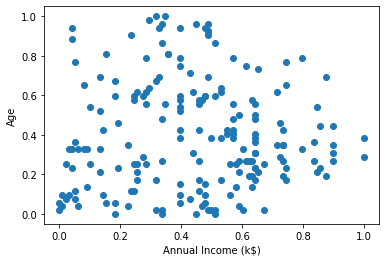

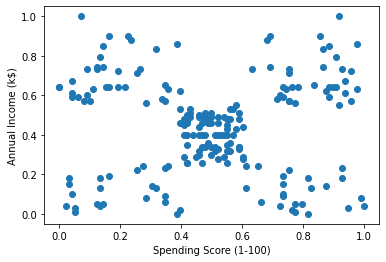

In [39]:
#Tampilkan scatter plot sebelum clustering dengan kombinasi 4 atribut
kombinasi = [
    ['Genre', 'Annual Income (k$)'],
    ['Age', 'Spending Score (1-100)'],
    ['Annual Income (k$)', 'Age'],
    ['Spending Score (1-100)', 'Annual Income (k$)']
]

for i in kombinasi:
    x = i[0]
    y = i[1]

    plt.scatter(data[x], data[y]) 

    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

MODELLING

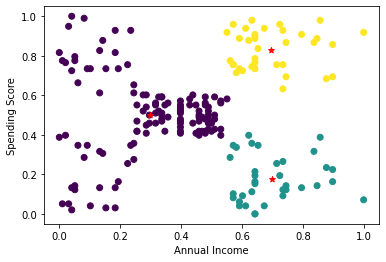

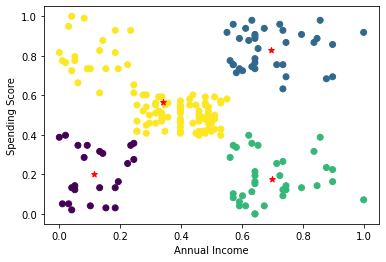

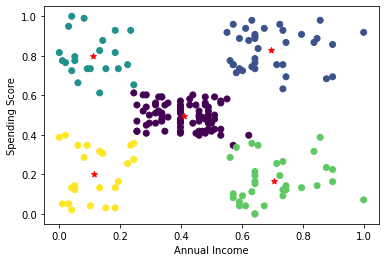

In [46]:
#Clusterlah dataset dengan nilai K 3, 4, 5 dengan atribut 'Annual Income (k$)' dan 'Spending Score (1-100)'

km = KMeans()
klaster = data.iloc[:, 2:4]

for j in range(3,6):
    km.n_clusters = j
    prediksi = km.fit_predict(klaster)
    
    #Tampilkan scatter plot setelah clustering dengan centroid masing-masing cluster
    plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=prediksi)
    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*', c='red')

    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.show()

# Tentukan manakah k terbaik jika dilakukan analisis secara visual : K5

Optional

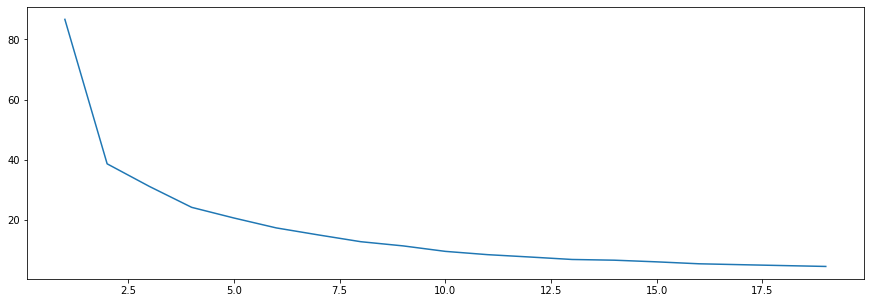

In [49]:
#Lakukan implementasi elbow method untuk mendeteksi K terbaik
x = []
y = []

for k in range(1,20):
    km.n_clusters = k
    km.fit_predict(data)

    x.append(k)
    y.append(km.inertia_)

plt.figure(figsize=(15, 5))
plt.plot(x, y)
plt.show()

In [62]:
#Lakukan PCA untuk feature reduction dari seluruh feature menjadi 2 feature
pca = PCA(n_components=2)

komponenPrincipal = pca.fit_transform(data)

dataPrincipal = pd.DataFrame(data=komponenPrincipal, columns=['komponen principal 1','komponen principal 2'])

dataPrincipal

,komponen principal 1,komponen principal 2
0,0.528388,-0.244716
1,0.505504,-0.501198
2,-0.445788,0.080630
3,-0.484951,-0.358379
4,-0.452226,0.006440
...,...,...
189,-0.447851,-0.251654
190,-0.412873,0.140540
191,-0.443204,-0.200102
192,0.593565,0.137827


Text(0.5, 1.0, '2 component PCA')

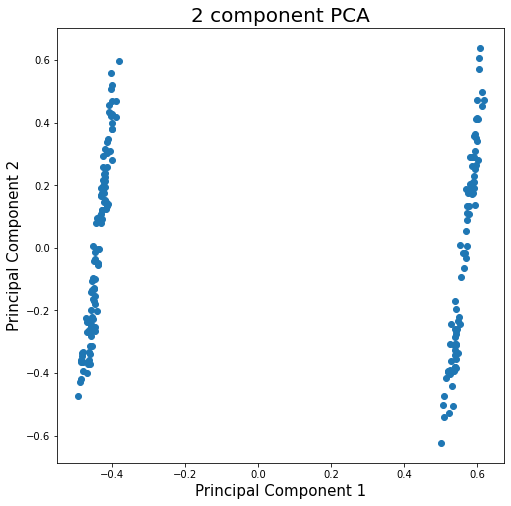

In [64]:
figure = plt.figure(figsize = (8,8))
a = figure.add_subplot(1,1,1) 
a.scatter(dataPrincipal['komponen principal 1'], dataPrincipal['komponen principal 2'])
a.set_xlabel('Principal Component 1', fontsize = 15)
a.set_ylabel('Principal Component 2', fontsize = 15)
a.set_title('2 component PCA', fontsize = 20)


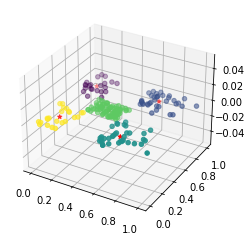

In [83]:
#Lakukan visualisasi 3D scatterplot setelah clustering
km = KMeans()
klaster = data.iloc[:, 2:4]

for j in range(5,6):
    km.n_clusters = j
    prediksi = km.fit_predict(klaster)
    
    #Tampilkan scatter plot setelah clustering dengan centroid masing-masing cluster
    fig = plt.figure()  
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=prediksi)
    scatter = ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*', c='red')

plt.show()